In [2]:
import pandas as pd

data_test_group = pd.read_csv('/content/sample_data/test_group.csv')
data_control_group = pd.read_csv('/content/sample_data/control_group.csv')

# Проверка данных на пропущенные значения и корректировка (для задания 1)
print(data_test_group.isnull().sum())
print(data_control_group.isnull().sum())
print((data_control_group.isna().sum() / len(data_control_group)).round(4) * 100)
print(display(data_control_group))

data_control_group = data_control_group.drop(labels = [4],axis = 0)
data_test_group = data_test_group.drop(labels = [4],axis = 0)

# Количество уникальных пользователей (расчет проведен для оценки размера выборки)
print(data_test_group.agg({'Reach' : 'sum'}))
print(data_control_group.agg({'Reach' : 'sum'}))
print(data_test_group.agg({'Reach' : 'sum'}) + data_control_group.agg({'Reach' : 'sum'}))

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64
Campaign Name          0.00
Date                   0.00
Spend [USD]            0.00
# of Impressions       3.33
Reach                  3.33
# of Website Clicks    3.33
# of Searches          3.33
# of View Content      3.33
# of Add to Cart       3.33
# of Purchase          3.33
dtype: float64


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


None
Reach    1509609
dtype: int64
Reach    2576503.0
dtype: float64
Reach    4086112.0
dtype: float64


In [3]:
# Расчет метрик, подготовка данных (для задания 2)
frames = [data_test_group, data_control_group]
df = pd.concat(frames)
df['actions'] = df['# of Purchase']+df['# of Searches']+df['# of View Content']+df['# of Add to Cart']

metrics = df[['Campaign Name', 'Spend [USD]', '# of Purchase', '# of Website Clicks', 'actions']].copy()
metrics['CR'] = (metrics['actions']/metrics['# of Website Clicks'])*100
metrics['CPO'] = metrics['Spend [USD]']/metrics['# of Purchase']
grouped_metrics = metrics.groupby('Campaign Name')

metrics_A = grouped_metrics.get_group('Control Campaign')
del metrics_A['Campaign Name']
metrics_B = grouped_metrics.get_group('Test Campaign')
del metrics_B['Campaign Name']

<ipython-input-4-01238d2f86ba>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in j.iteritems ():


Spend [USD] имеет нормальное распределение.
# of Purchase имеет нормальное распределение.
# of Website Clicks имеет нормальное распределение.
actions имеет нормальное распределение.
CR не имеет нормального распределения.
CPO не имеет нормального распределения.
Spend [USD] имеет нормальное распределение.
# of Purchase не имеет нормального распределения.
# of Website Clicks не имеет нормального распределения.
actions имеет нормальное распределение.
CR не имеет нормального распределения.
CPO не имеет нормального распределения.


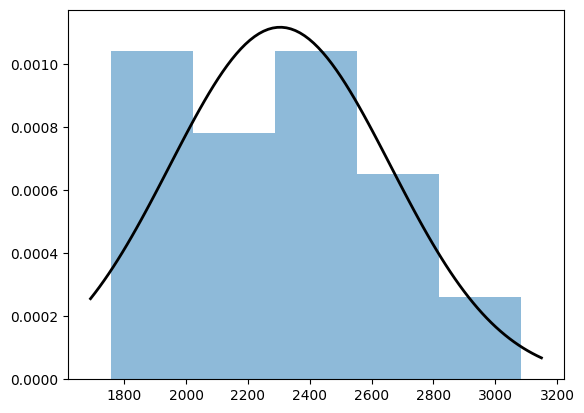

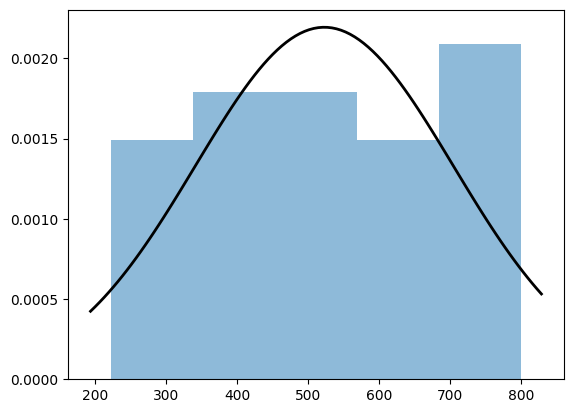

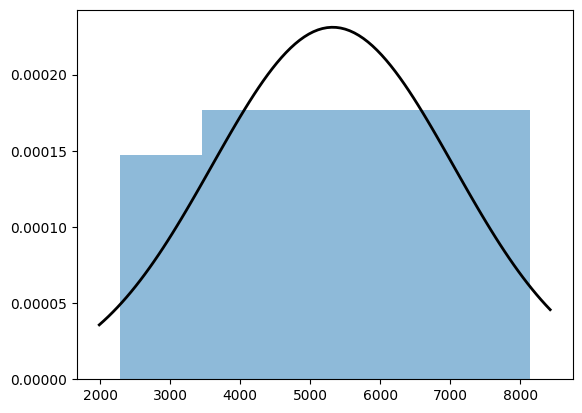

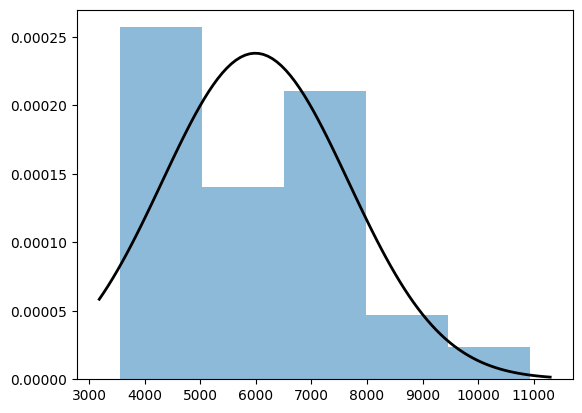

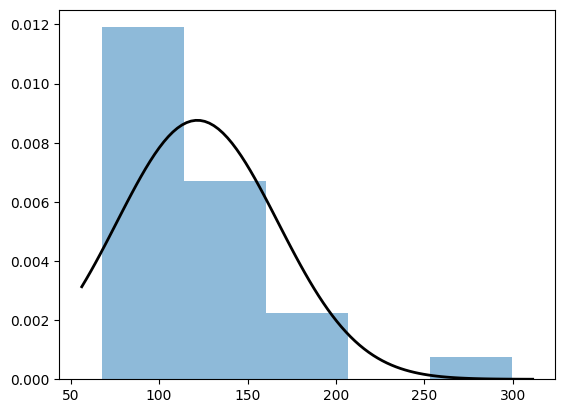

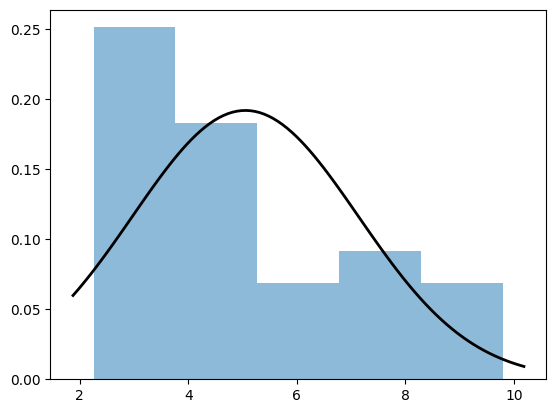

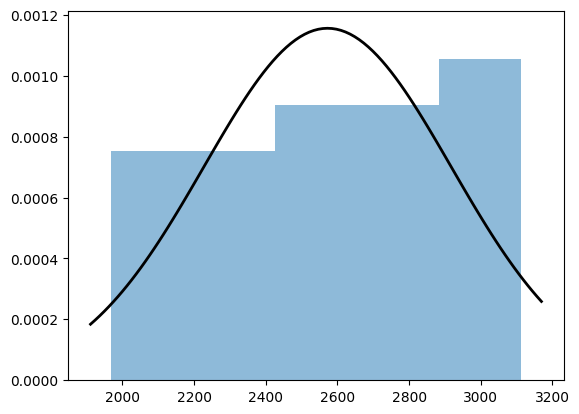

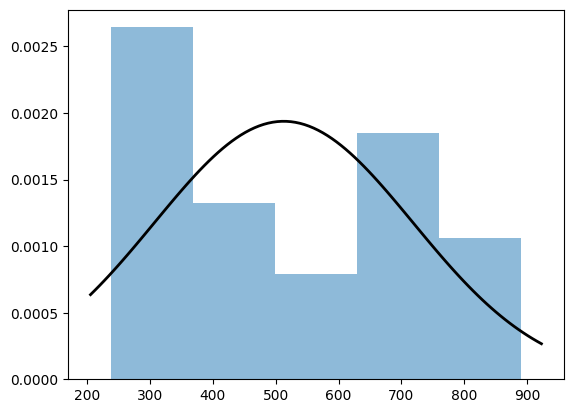

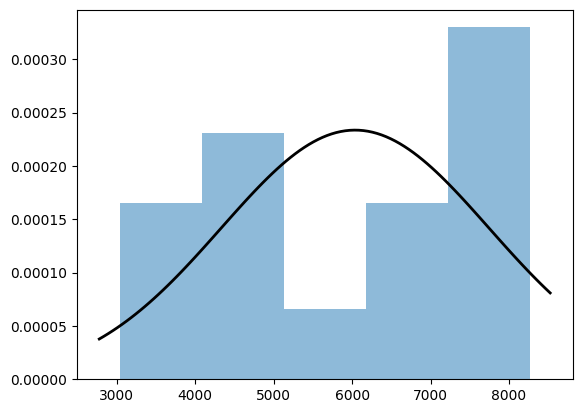

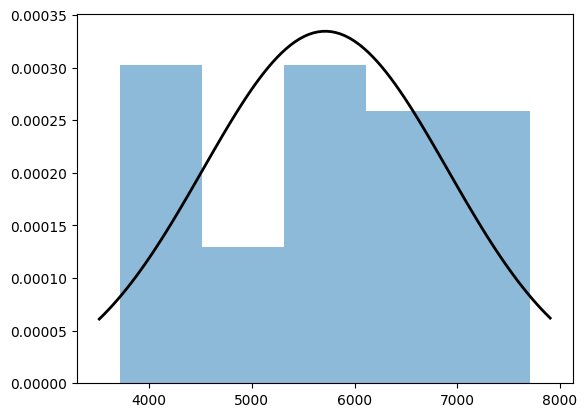

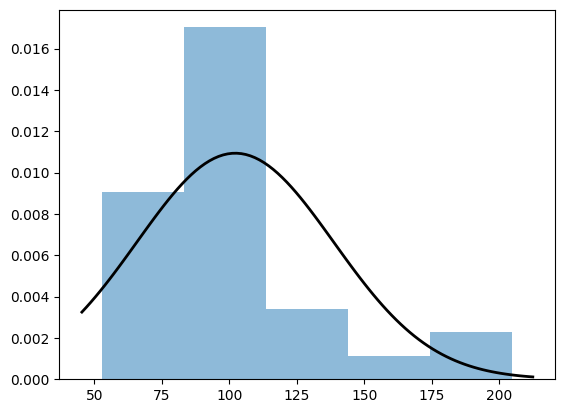

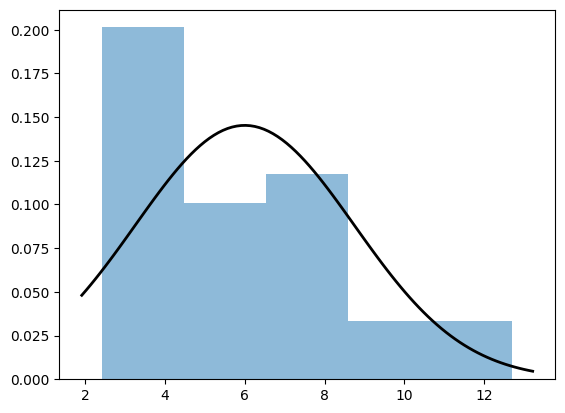

In [4]:
from tables.table import Column
# Проверка нормальности распределения (для задания 2)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

# Применяем тест Шапиро-Уилка
for j in metrics_A, metrics_B:
  for name, values in j.iteritems ():
    stat, p = shapiro(values)

    alpha = 0.05
    if p > alpha:
        print(f'{name} имеет нормальное распределение.')
    else:
        print(f'{name} не имеет нормального распределения.')

    # График с распределением
    fig, ax = plt.subplots()
    ax.hist(values.values, bins=5, density=True, alpha=0.5, label='Data')

    mu, std = norm.fit(values.values)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label='Normal distribution')

In [5]:
# Для задания 3

# Tест Стьюдента
from scipy. stats import ttest_ind

print(ttest_ind(metrics_A['Spend [USD]'], metrics_B['Spend [USD]']))
print(ttest_ind(metrics_A['actions'], metrics_B['actions']))

# Тест Манна‑Уитни
import scipy.stats as stats

print(stats. mannwhitneyu (metrics_A['# of Purchase'], metrics_B['# of Purchase'], alternative='two-sided'))
print(stats. mannwhitneyu (metrics_A['# of Website Clicks'], metrics_B['# of Website Clicks'], alternative='two-sided'))
print(stats. mannwhitneyu (metrics_A['CR'], metrics_B['CR'], alternative='two-sided'))
print(stats. mannwhitneyu (metrics_A['CPO'], metrics_B['CPO'], alternative='two-sided'))

TtestResult(statistic=-2.8572306229663287, pvalue=0.005988016547794708, df=56.0)
TtestResult(statistic=0.7045796963625963, pvalue=0.4839918679461932, df=56.0)
MannwhitneyuResult(statistic=436.0, pvalue=0.8155354572265037)
MannwhitneyuResult(statistic=325.0, pvalue=0.13957561864017773)
MannwhitneyuResult(statistic=546.0, pvalue=0.051906046869913264)
MannwhitneyuResult(statistic=337.0, pvalue=0.19678772302989056)


In [6]:
# Для задания 4
# Бутстрап
import scipy.stats as st
import seaborn as sns

for d in metrics_A, metrics_B:
    for column in d:
      pvalues = []
      for _ in range(10000):
        group_1 = d[column].sample(500, replace=True).tolist()
        group_2 = d[column].sample(500, replace=True).tolist()
        pvalues.append(st.ttest_ind(group_1, group_2, equal_var=False)[1])

      #sns.histplot(pvalues)

      perc = sum([1 for i in pvalues if i <= 0.05]) / 10000 * 100
      print(f'{perc}% это процент p-значений, которые меньше 0,05 для {column}')

4.760000000000001% это процент p-значений, которые меньше 0,05 для Spend [USD]
4.91% это процент p-значений, которые меньше 0,05 для # of Purchase
5.09% это процент p-значений, которые меньше 0,05 для # of Website Clicks
4.74% это процент p-значений, которые меньше 0,05 для actions
4.93% это процент p-значений, которые меньше 0,05 для CR
4.96% это процент p-значений, которые меньше 0,05 для CPO
5.050000000000001% это процент p-значений, которые меньше 0,05 для Spend [USD]
5.029999999999999% это процент p-значений, которые меньше 0,05 для # of Purchase
5.06% это процент p-значений, которые меньше 0,05 для # of Website Clicks
5.35% это процент p-значений, которые меньше 0,05 для actions
5.24% это процент p-значений, которые меньше 0,05 для CR
4.97% это процент p-значений, которые меньше 0,05 для CPO


In [15]:
# Ключевые метрики по группам (для задания 5)
sum_metrics = grouped_metrics.agg({'Spend [USD]' : 'sum', '# of Website Clicks' : 'sum','actions' : 'sum', '# of Purchase' : 'sum'})
sum_metrics['CR'] = (sum_metrics['actions']/sum_metrics['# of Website Clicks'])*100
sum_metrics['CPO'] = sum_metrics['Spend [USD]']/sum_metrics['# of Purchase']
sum_metrics

,Spend [USD],# of Website Clicks,actions,# of Purchase,CR,CPO
Campaign Name,,,,,,
Control Campaign,66818,154303.0,173649.0,15161.0,112.537669,4.407229
Test Campaign,74595,175107.0,165704.0,14869.0,94.630140,5.016814


In [40]:
# Расчет мощности (для задания 5)
import statsmodels.stats.power as smp
chipower = smp.GofChisquarePower()

def chi2_effect_size(p0, p1):
  return np.sqrt(((p0 - p1)**2 / p0))
for column in sum_metrics:
  control = sum_metrics[column].values[0]
  test = sum_metrics[column].values[1]
  value = chi2_effect_size(control, test)
  a = chipower.solve_power(effect_size = value,
                       nobs = 29,
                       alpha = 0.05,
                       power = None)
  print(f'Мощность для метрики {column} = {a}')

Мощность для метрики Spend [USD] = 1.0
Мощность для метрики # of Website Clicks = 1.0
Мощность для метрики actions = 1.0
Мощность для метрики # of Purchase = 1.0
Мощность для метрики CR = 0.9999999999994998
Мощность для метрики CPO = 0.34616347493525784
